In [80]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("CO2_Emissions_Sample_Cleaned.csv")

Clean the Dataset.
- Since only a few values are missing dropping these rows shouldn't disturb the data.

In [81]:
df = df.dropna(subset=["CO2_Emissions","Methane_Emissions","GDP"])
df.to_csv("CO2_Emissions_Sample_cleaned.csv", index=False) 

### Part A - Visualizing Amounts
Draw a bar chart showing the top 10 countries by CO₂ emissions in 2020.
- Add titles, captions, and axis labels.

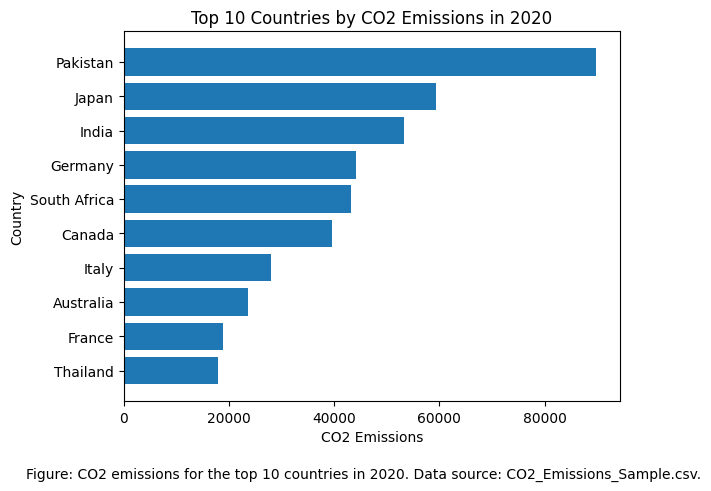

In [82]:
# Isolate for only the year 2020
year2020 = df[df["Year"] == 2020]

# Get only the top 10
top10 = year2020.sort_values("CO2_Emissions", ascending=False).head(10)

# Sort values so highest goes to the top
top10 = top10.sort_values("CO2_Emissions")

# Plot horizontal bar graph (country on y-axis and CO2 on x-axis)
plt.barh(top10["Country"], top10["CO2_Emissions"])

plt.xlabel("CO2 Emissions")
plt.ylabel("Country")
plt.title("Top 10 Countries by CO2 Emissions in 2020")

# Caption
plt.figtext(0.5, -0.05, "Figure: CO2 emissions for the top 10 countries in 2020. Data source: CO2_Emissions_Sample.csv.", ha="center")

plt.show()

### Part A - Visualizing Amounts
Draw a stacked bar chart showing CO₂, Methane, and Nitrous emissions for the same countries.
- Add titles, captions, and axis labels.

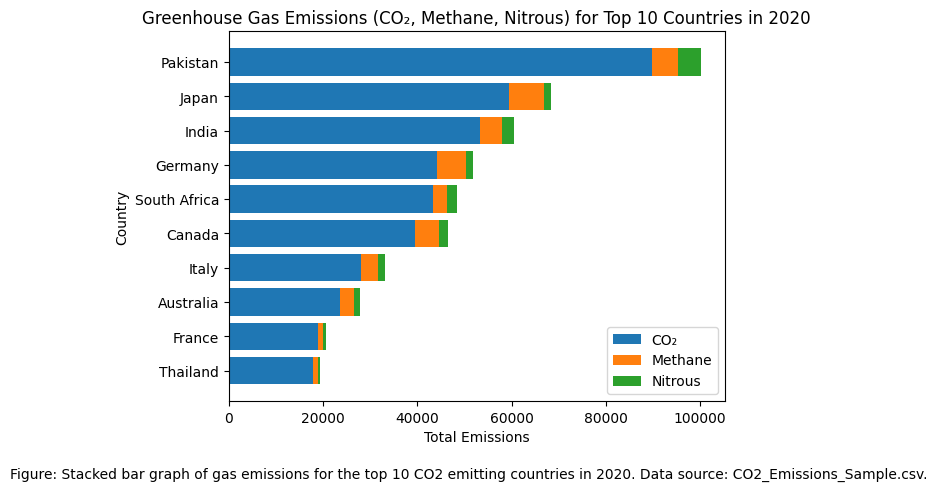

In [83]:
# Making it easier to read code
co2 = top10["CO2_Emissions"]
methane = top10["Methane_Emissions"]
nitrous = top10["Nitrous_Emissions"]

# plot co2
plt.barh(top10["Country"], co2, label="CO₂")

# plot methane on top of co2
plt.barh(top10["Country"], methane, left=co2, label="Methane")

# plot nitrous on top of methane
plt.barh(top10["Country"], nitrous, left=co2 + methane, label="Nitrous")

plt.xlabel("Total Emissions")
plt.ylabel("Country")
plt.title("Greenhouse Gas Emissions (CO₂, Methane, Nitrous) for Top 10 Countries in 2020")

plt.legend()

# Caption
plt.figtext(0.5, -0.05, "Figure: Stacked bar graph of gas emissions for the top 10 CO2 emitting countries in 2020. Data source: CO2_Emissions_Sample.csv.", ha="center")
plt.show()


### Part B – Visualizing Associations
Scatter plot: GDP vs CO2 emissions (color = Continent).

Note: I used only the year 2020 because using all years make it almost impossible to make out most the data points. The data is clustered and therefore I thought it was resonable to only use the year 2020.

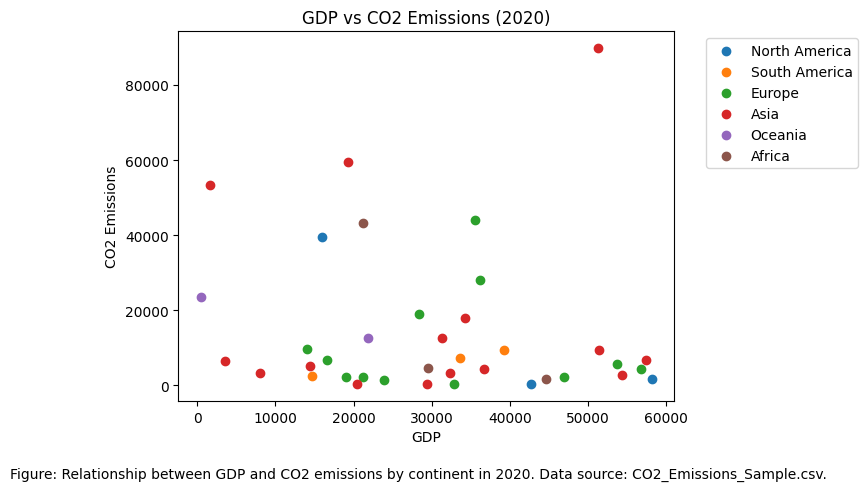

In [84]:
# 2020 only
df_2020 = df[df["Year"] == 2020]

# loop through each continent for coloring
for continent in df_2020["Continent"].unique():
    subset = df_2020[df_2020["Continent"] == continent]

    # plot scatter
    plt.scatter(subset["GDP"], subset["CO2_Emissions"], label=continent)

plt.xlabel("GDP")
plt.ylabel("CO2 Emissions")
plt.title("GDP vs CO2 Emissions (2020)")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.figtext(0.5, -0.05, "Figure: Relationship between GDP and CO2 emissions by continent in 2020. Data source: CO2_Emissions_Sample.csv.", ha="center")

plt.show()

Comment on any visible patterns or relationships.
- I see that most countries no matter what the GDP is has a CO2 emission of below 100000. 
- Other than that I can't make out any other patterns.

### Part B – Visualizing Associations
Bubble chart: GDP vs CO2, bubble size = Population.

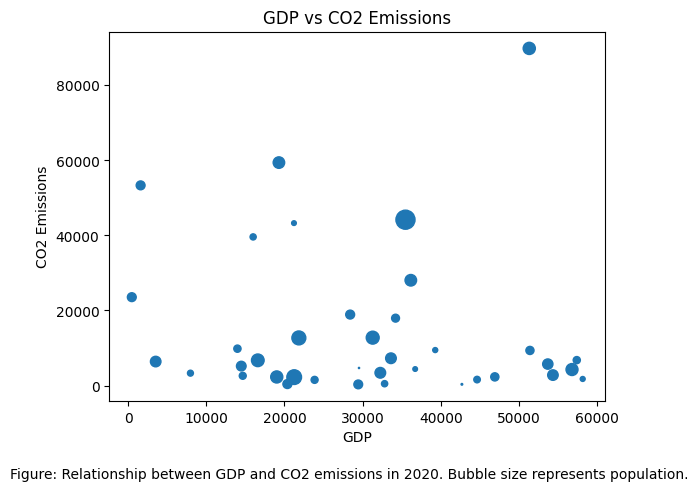

In [85]:
plt.scatter(year2020["GDP"], year2020["CO2_Emissions"], s=year2020["Population"] / 1000000)

plt.xlabel("GDP")
plt.ylabel("CO2 Emissions")
plt.title("GDP vs CO2 Emissions")

plt.figtext(0.5, -0.05, "Figure: Relationship between GDP and CO2 emissions in 2020. Bubble size represents population.", ha="center")

plt.show()

Comment on any visible patterns or relationships.
- I see a loose pattern where a higher GDP correlates to a higher CO2 emission. 
- Overall, I can't really see a repeating or strong pattern as the population sizes are scattered and as well as the GDP vs CO2.

### Part B – Visualizing Associations
Correlogram: correlation matrix for CO₂, GDP, Methane, Nitrous.

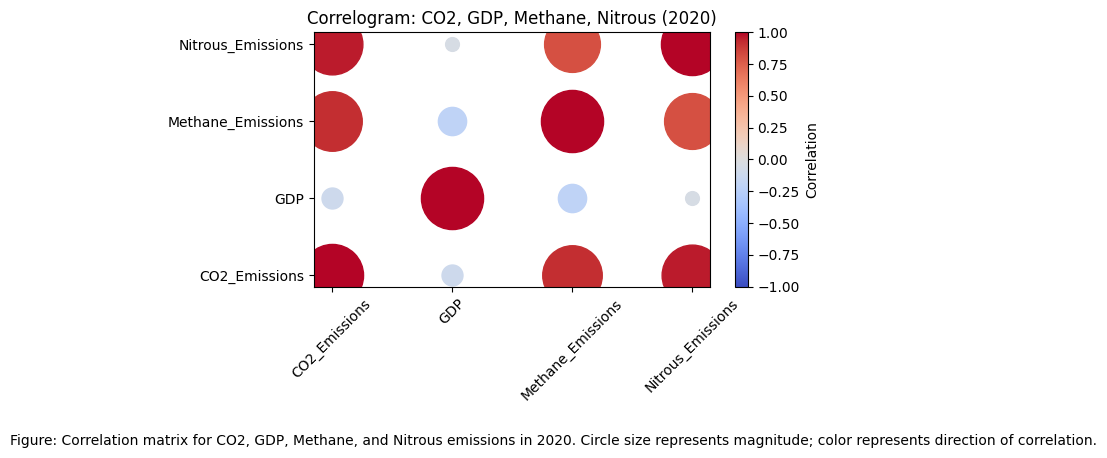

In [86]:
# select
corr = df_2020[["CO2_Emissions", "GDP", "Methane_Emissions", "Nitrous_Emissions"]].corr()

# plot correlogram
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        value = corr.iloc[i, j]
        plt.scatter(
                    i, j,
                    s=abs(value) * 2000,   # size = magnitude
                    c=value,              # color = direction
                    cmap="coolwarm",
                    vmin=-1, vmax=1
                    )

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45) # x-axis labels overlapping problem
plt.yticks(range(len(corr.columns)), corr.columns)

plt.colorbar(label="Correlation")
plt.title("Correlogram: CO2, GDP, Methane, Nitrous (2020)")
plt.figtext(0.5, 0.02, "Figure: Correlation matrix for CO2, GDP, Methane, and Nitrous emissions in 2020. Circle size represents magnitude; color represents direction of correlation.", ha="center")
plt.subplots_adjust(bottom=0.35)
plt.show()

Comment on any visible patterns or relationships.
- I see a strong pattern where countries that emit large amounts of CO2 also tend to emit large amounts of methane and nitrous.
- I don't see any strong relationship with GDP and any emissions.

### Part C – Visualizing Proportions
Stacked bar chart: show the relative share of CO₂, Methane, and Nitrous emissions by
continent in 2020.

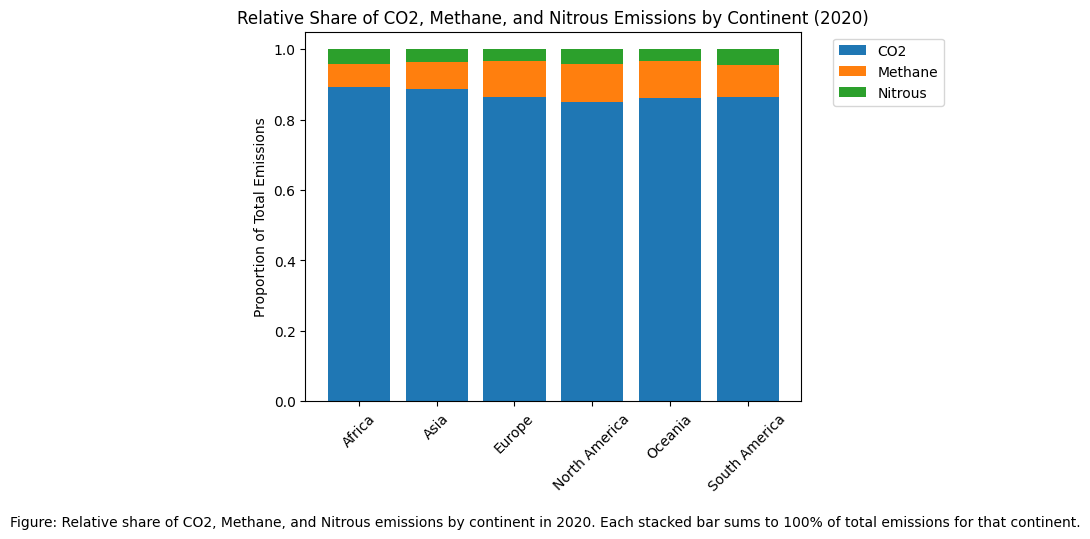

In [87]:
# group by continent
grouped = df_2020.groupby("Continent")[["CO2_Emissions", "Methane_Emissions", "Nitrous_Emissions"]].sum()

# calculate total emissions for each continent
total = grouped["CO2_Emissions"] + grouped["Methane_Emissions"] + grouped["Nitrous_Emissions"]

co2 = grouped["CO2_Emissions"] / total
methane = grouped["Methane_Emissions"] / total
nitrous = grouped["Nitrous_Emissions"] / total

# plot
plt.bar(grouped.index, co2, label="CO2")
plt.bar(grouped.index, methane, bottom=co2, label="Methane")
plt.bar(grouped.index, nitrous, bottom=co2 + methane, label="Nitrous")

plt.ylabel("Proportion of Total Emissions")
plt.title("Relative Share of CO2, Methane, and Nitrous Emissions by Continent (2020)")

plt.xticks(rotation=45) # x-axis labels overlapping problem
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.figtext(0.5, -0.15, "Figure: Relative share of CO2, Methane, and Nitrous emissions by continent in 2020. Each stacked bar sums to 100% of total emissions for that continent.", ha="center")
plt.show()

### Part C – Visualizing Proportions (20 marks)
Treemap or pie chart: illustrate emission contributions by region.

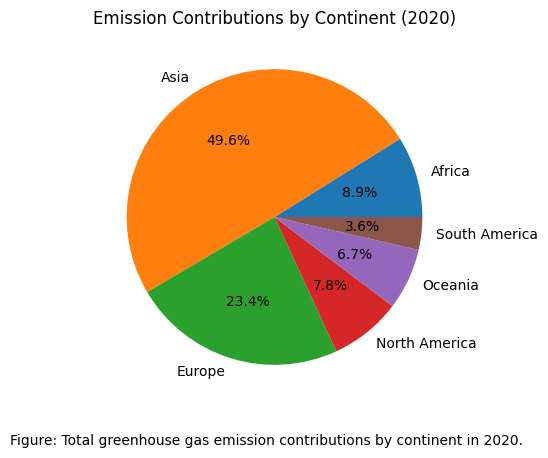

In [88]:
# compute total emissions per continent
grouped["Total"] = grouped["CO2_Emissions"] + grouped["Methane_Emissions"] + grouped["Nitrous_Emissions"]

# plot
plt.pie(grouped["Total"], labels=grouped.index, autopct="%1.1f%%")

plt.title("Emission Contributions by Continent (2020)")
plt.figtext(0.5, 0.02, "Figure: Total greenhouse gas emission contributions by continent in 2020.", ha="center")
plt.show()

### Part D – Visualizing Time Series (15 marks)
Line chart: CO₂ emissions from 2000–2024 for 5 selected countries.

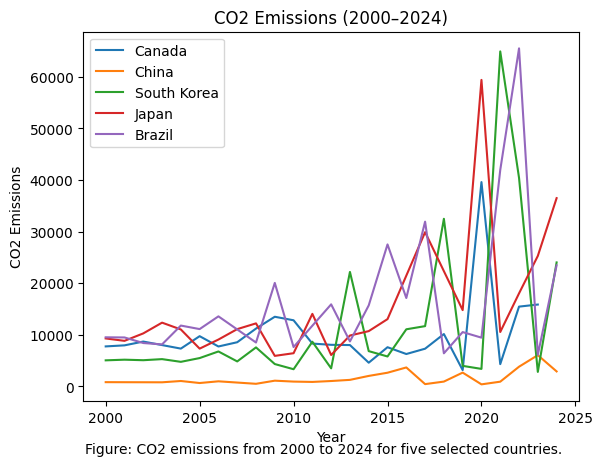

In [89]:
# Select countries
countries = ["Canada", "China", "South Korea", "Japan", "Brazil"]

# plot
for country in countries:
    country_data = df[df["Country"] == country]
    plt.plot(country_data["Year"], country_data["CO2_Emissions"], label=country)

plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.title("CO2 Emissions (2000–2024)")

plt.legend()

plt.figtext(0.5, 0.002, "Figure: CO2 emissions from 2000 to 2024 for five selected countries.", ha="center")

plt.show()

### Part D – Visualizing Time Series
Add a 5-year moving average to smooth the trend.

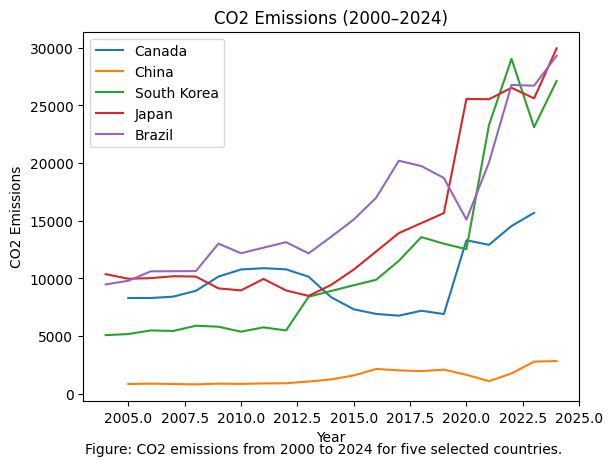

In [90]:
# Select countries
countries = ["Canada", "China", "South Korea", "Japan", "Brazil"]

# plot
for country in countries:
    country_data = df[df["Country"] == country]
    # calculate 5 year moving average
    moving_avg = country_data["CO2_Emissions"].rolling(5).mean()
    plt.plot(country_data["Year"], moving_avg, label=country)

plt.xlabel("Year")
plt.ylabel("CO2 Emissions")
plt.title("CO2 Emissions (2000–2024)")

plt.legend()

plt.figtext(0.5, 0.002, "Figure: CO2 emissions from 2000 to 2024 for five selected countries.", ha="center")

plt.show()

### Part D – Visualizing Time Series (15 marks)
Discuss general trends (increase, decrease, stability).
- In the first line graph we see that Canada, South Korea, Japan, and Brazil show large spikes around 2019 - 2024.
- All of these countries also dropped significantly and rebounded a little bit back up
- China on the other hand showed steady CO2 emissions with a little increase in total
- From the mean graph we can see a massive increasing trend with those 4 same countries while China remains steady with a slight increase in total compared to the other 4.

### Part E – PCA Representation
In this part, you will use Principal Component Analysis (PCA) to summarize and compare
continents based on their emissions and economic characteristics.

1) Data aggregation
- a) Filter the dataset to Year = 2020.
- b) For each continent, compute the mean of the following columns: (CO₂emissions, Methane emissions, Nitrous emissions, GDP, Population)
    -  i) Each continent will be represented by one feature vector of 5 values.
2) PCA feature extraction
- a) Standardize the aggregated continent-level features using (StandardScaler).
- b) Apply PCA with exactly 2 components.
- c) Report the explained variance percentage of PCA1 and PCA2.

3) Visualization
- a) Create a 2D scatter plot (PC1 vs PC2) where each point represents one continent, include a legend to identify each continent

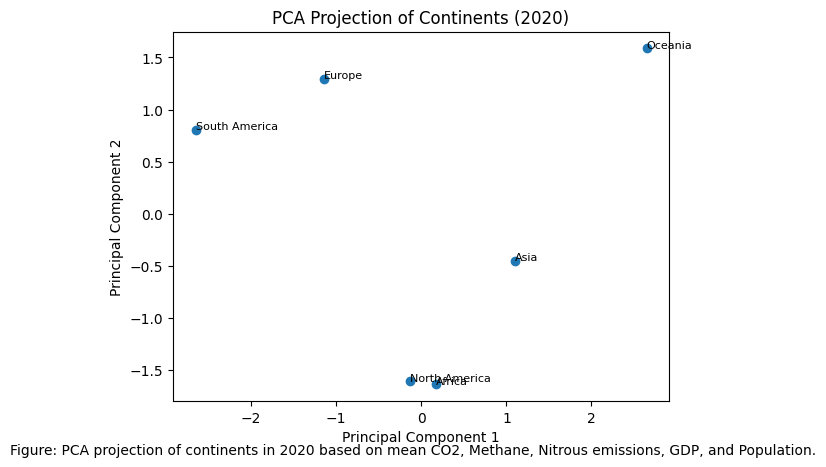

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 1) a)
df_2020 = df[df["Year"] == 2020]

# b) and i)
grouped = df_2020.groupby("Continent")[["CO2_Emissions", "Methane_Emissions", "Nitrous_Emissions", "GDP", "Population"]].mean()

# 2) a)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped)

# 2) b)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 2) c)
explained_variance = pca.explained_variance_ratio_ * 100

# 3) a)
plt.scatter(principal_components[:, 0], principal_components[:, 1])

for i in range(len(grouped.index)):
    plt.text(principal_components[i, 0], principal_components[i, 1], grouped.index[i], fontsize=8)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Continents (2020)")
plt.figtext(0.5, 0.0001, "Figure: PCA projection of continents in 2020 based on mean CO2, Methane, Nitrous emissions, GDP, and Population.", ha="center")
plt.show()


### Part E – PCA Representation
In this part, you will use Principal Component Analysis (PCA) to summarize and compare
continents based on their emissions and economic characteristics.

4) Interpretation
- a) Briefly explain why PCA is appropriate after aggregating by continent and what PC1 and PC2 represent.
    - PCA is appropriate after aggregating by continent because each continent is represented by a feature vector. PCA requries a matrix of observations, therefore needing the feature vectors.
    - PC1: Represents the most import direction of variation.
    - PC2: Represents the second most important direction of variation.
- b) Explain what the positions of continents suggest about their emissions and economic profiles
    - Most of the continents are very far apart which suggests that their emissions and econmic profiles most likely differ a lot. 
    - PC1 separates continents mostly on strongest varation in emissions and econmic scale so the separation means that either the continents have very different emissions or ecnomic scales. 